In [1]:
import mplfinance as mpf
import pandas as pd
from dataloader import get_candle_data
import numpy as np

In [5]:
symbol = 'PFIZER'
portfolio = pd.read_csv('../data/portfolio.csv')
#print(portfolio.head())
#print(portfolio[portfolio['SYMBOL'] == symbol])
instrument = portfolio.loc[portfolio['SYMBOL'] == symbol, 'INSTRUMENT_KEY']
instrument = 'NSE_EQ|INE182A01018'
instrument = instrument.replace('|', '%7C')
#instrument = instrument.reset_index()
instrument

'NSE_EQ%7CINE182A01018'

In [6]:
instrument.loc[0, 'INSTRUMENT_KEY']

AttributeError: 'str' object has no attribute 'loc'

In [7]:
to_date = '2025-07-05'
from_date = '2005-01-01' #'2023-01-01'
frequency = '1'
interval = 'months'

In [ ]:
candle_data = get_candle_data(str(instrument.loc[0, 'INSTRUMENT_KEY']), interval, to_date, from_date, frequency)

https://api.upstox.com/v3/historical-candle/NSE_EQ%7CINE182A01018/months/1/2025-07-05/2005-01-01
{'status': 'success', 'data': {'candles': [['2025-07-01T00:00:00+05:30', 5749.0, 5850.0, 5685.0, 5784.0, 225457, 0], ['2025-06-01T00:00:00+05:30', 5590.0, 5993.0, 5443.0, 5677.5, 739216, 0], ['2025-05-01T00:00:00+05:30', 4310.5, 5671.3, 4100.1, 5613.3, 2342420, 0], ['2025-04-01T00:00:00+05:30', 3992.5, 4365.0, 3701.0, 4292.8, 408302, 0], ['2025-03-01T00:00:00+05:30', 4130.0, 4196.0, 3865.0, 4004.5, 610488, 0], ['2025-02-01T00:00:00+05:30', 4466.05, 4594.89, 3910.0, 4050.75, 1846812, 0], ['2025-01-01T00:00:00+05:30', 5270.0, 5544.0, 4413.05, 4538.2, 624434, 0], ['2024-12-01T00:00:00+05:30', 5314.0, 5469.0, 4601.0, 5281.5, 1097365, 0], ['2024-11-01T00:00:00+05:30', 5120.0, 5448.0, 5036.65, 5313.25, 317876, 0], ['2024-10-01T00:00:00+05:30', 5768.05, 6020.0, 5052.7, 5097.9, 954792, 0], ['2024-09-01T00:00:00+05:30', 6100.0, 6451.15, 5380.0, 5722.05, 1296411, 0], ['2024-08-01T00:00:00+05:30', 563

In [9]:
candle_data

,date,open,high,low,close,vol,misc
date,,,,,,,
2025-07-01 00:00:00+05:30,2025-07-01T00:00:00+05:30,5749.00,5850.00,5685.00,5784.00,225457,0
2025-06-01 00:00:00+05:30,2025-06-01T00:00:00+05:30,5590.00,5993.00,5443.00,5677.50,739216,0
2025-05-01 00:00:00+05:30,2025-05-01T00:00:00+05:30,4310.50,5671.30,4100.10,5613.30,2342420,0
2025-04-01 00:00:00+05:30,2025-04-01T00:00:00+05:30,3992.50,4365.00,3701.00,4292.80,408302,0
2025-03-01 00:00:00+05:30,2025-03-01T00:00:00+05:30,4130.00,4196.00,3865.00,4004.50,610488,0
...,...,...,...,...,...,...,...
2005-05-01 00:00:00+05:30,2005-05-01T00:00:00+05:30,552.74,600.12,537.82,594.87,245126,0
2005-04-01 00:00:00+05:30,2005-04-01T00:00:00+05:30,567.35,579.59,522.73,553.09,174346,0
2005-03-01 00:00:00+05:30,2005-03-01T00:00:00+05:30,521.15,588.27,506.23,565.65,560004,0


In [10]:
candle_data.sort_index(ascending=True, inplace=True)

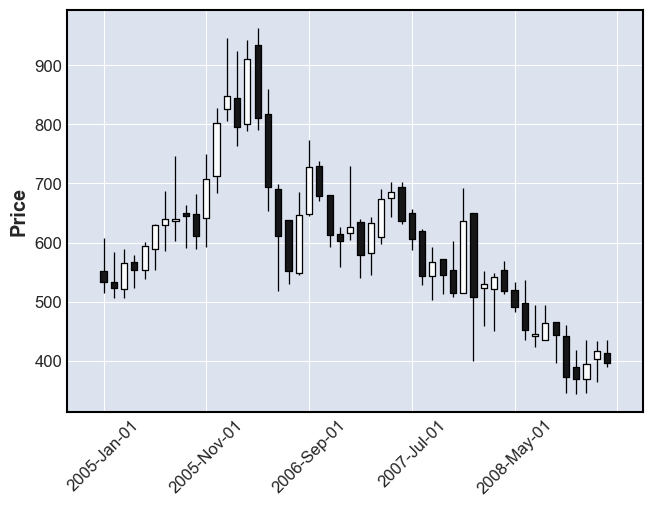

In [11]:
mpf.plot(candle_data[:50], type='candle')

In [12]:
candle_data['returns'] = candle_data['close']/candle_data['close'].shift(1) -1
candle_data['l_returns'] = np.log(candle_data['close']/candle_data['close'].shift(1))
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2005-01-01 00:00:00+05:30,2005-01-01T00:00:00+05:30,551.52,607.90,514.96,532.37,585159,0,NaN,NaN
2005-02-01 00:00:00+05:30,2005-02-01T00:00:00+05:30,533.00,583.54,506.55,522.65,406219,0,-0.018258,-0.018427
2005-03-01 00:00:00+05:30,2005-03-01T00:00:00+05:30,521.15,588.27,506.23,565.65,560004,0,0.082273,0.079063
2005-04-01 00:00:00+05:30,2005-04-01T00:00:00+05:30,567.35,579.59,522.73,553.09,174346,0,-0.022205,-0.022455
2005-05-01 00:00:00+05:30,2005-05-01T00:00:00+05:30,552.74,600.12,537.82,594.87,245126,0,0.075539,0.072822


In [13]:
candle_data.dropna(inplace=True)
candle_data.head()

,date,open,high,low,close,vol,misc,returns,l_returns
date,,,,,,,,,
2005-02-01 00:00:00+05:30,2005-02-01T00:00:00+05:30,533.00,583.54,506.55,522.65,406219,0,-0.018258,-0.018427
2005-03-01 00:00:00+05:30,2005-03-01T00:00:00+05:30,521.15,588.27,506.23,565.65,560004,0,0.082273,0.079063
2005-04-01 00:00:00+05:30,2005-04-01T00:00:00+05:30,567.35,579.59,522.73,553.09,174346,0,-0.022205,-0.022455
2005-05-01 00:00:00+05:30,2005-05-01T00:00:00+05:30,552.74,600.12,537.82,594.87,245126,0,0.075539,0.072822
2005-06-01 00:00:00+05:30,2005-06-01T00:00:00+05:30,588.27,631.70,553.61,629.02,252104,0,0.057408,0.055820


In [14]:
candle_data.to_csv(f'../data/symbols/{symbol}.csv')